<a href="https://colab.research.google.com/github/nayakr1127/Learning_Tensorflow_2.0/blob/main/TF2_0_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Install TensorFlow
!pip install -q tensorflow
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD


2.4.1


In [3]:
# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Get data
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-03-06 11:54:51--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-03-06 11:54:51 (33.6 MB/s) - ‘moore.csv’ saved [2302/2302]



# Exploratory Data Analysis

In [11]:
data = pd.read_csv('moore.csv', header=None).values # Convert to numpy array
data[:5]

array([[1971, 2300],
       [1972, 3500],
       [1973, 2500],
       [1973, 2500],
       [1974, 4100]])

In [12]:
X = data[:,0].reshape(-1, 1) # Dat needs to be N x D instead of vector
Y = data[:,1] # Extract vector of targets

In [13]:
X.shape # N x D matrix, where D = 1

(162, 1)

In [14]:
Y.shape # N size vector, 1 target per data point

(162,)

Text(0.5, 0, 'Year')

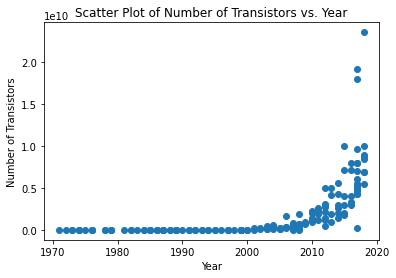

In [15]:
plt.scatter(X, Y)
plt.title("Scatter Plot of Number of Transistors vs. Year")
plt.ylabel("Number of Transistors")
plt.xlabel("Year")

# Data Preprocessing

Text(0.5, 0, 'Year')

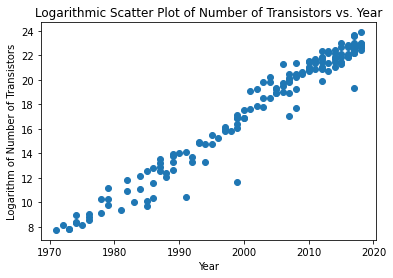

In [16]:
Y = np.log(Y)
plt.scatter(X, Y)
plt.title("Logarithmic Scatter Plot of Number of Transistors vs. Year")
plt.ylabel("Logarithm of Number of Transistors")
plt.xlabel("Year")

## Scaling Data

In [17]:
# Use mean to scale data
X = X - X.mean()

# Building Model

In [18]:
# Create layers
i = Input(shape=(1,)) # Shape of input data is 1-Dimensional numpy array.
x = Dense(1)(i) # No activation function because we are doing linear regression

model = Model(i, x)

# Compile model
learning_rate = 0.001
momentum = 0.9
model.compile(optimizer=SGD(learning_rate, momentum),
              loss='mse')

# Learning rate scheduler
# As we epoch becomes higher, decrease learning rate
def schedule(epoch):
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = LearningRateScheduler(schedule)



In [19]:
r = model.fit(X, Y,
              epochs = 200,
              callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 3ms/step - loss: 412.8665
Epoch 2/200
6/6 [==============================] - 0s 2ms/step - loss: 366.5581
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 247.7792
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 286.5244
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 208.2451
Epoch 6/200
6/6 [==============================] - 0s 2ms/step - loss: 179.9368
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 118.0879
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 149.0458
Epoch 9/200
6/6 [==============================] - 0s 2ms/step - loss: 178.8022
Epoch 10/200
6/6 [==============================] - 0s 2ms/step - loss: 113.7535
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - loss: 57.4563
Epoch 12/200
6/6 [==============================] - 0s 2ms/step - loss: 21.7380
Epoch 13/200
6/6 [=====================

# Model Evaluation

Text(0.5, 0, 'Epoch')

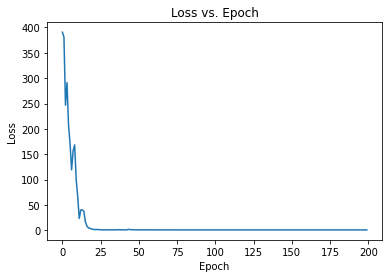

In [20]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')
plt.title("Loss vs. Epoch")
plt.ylabel('Loss')
plt.xlabel('Epoch')

## Prove Moore's law right

In [21]:
# Get weights of first Dense layer
print("Weights: ", model.layers[1])
print("Weights and biases: ", model.layers[1].get_weights())

Weights:  <tensorflow.python.keras.layers.core.Dense object at 0x7fa95e100e10>
Weights and biases:  [array([[0.33465993]], dtype=float32), array([17.765755], dtype=float32)]


In [22]:
a = model.layers[1].get_weights()[0][0][0]
b = model.layers[1].get_weights()[1][0]
print("Slope of line: ", a)
print("Bias of line: ", b)

Slope of line:  0.33465993
Bias of line:  17.765755


In [23]:
print("Time for transistors to double: ", np.log(2) / a)

Time for transistors to double:  2.071198581151493


## Making Predictions

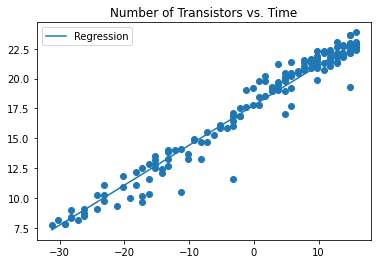

In [24]:
Yhat = model.predict(X)
plt.plot(X, Yhat, label='Regression')
plt.scatter(X, Y)
plt.title("Number of Transistors vs. Time")
plt.legend()

In [25]:
# The regression line fits the data


In [26]:
print(Yhat.shape)

(162, 1)


In [27]:
# Manual Calculations
Yhat2 = np.dot(a, X) + b
np.allclose(Yhat, Yhat2)

True

In [28]:
# So it model did indeed create a linear equation